In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from tqdm import tqdm
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2
from solat_cb.simulation import *
from solat_cb.spectra import *
from solat_cb.mle import *

In [19]:
libdir ='/pscratch/sd/l/lonappan/SOLAT'
nside = 1024
cb_method = 'iso'
beta = 0.35
dust = 10
synch = 5
alpha = [-0.1,-0.1,0.2,0.2,.15,.15]
atm_noise = True
nsplits = 2
bandpass = False
fit = "As + Asd + Ad + beta + alpha"
binwidth = 20
bmin = 60
bmax = 2000

In [20]:
lat_wn = LATsky(libdir,nside,cb_method,dust,synch,alpha,beta,atm_noise=False,nsplits=nsplits,bandpass=bandpass)
lat_1f = LATsky(libdir,nside,cb_method,dust,synch,alpha,beta,atm_noise=True,nsplits=nsplits,bandpass=bandpass)

CMB : INFO - Loading CMB power spectra from file


Noise : INFO - Noise Model: White noise v3.0.0
CMB : INFO - Loading CMB power spectra from file
Noise : INFO - Noise Model: White + 1/f noise v3.0.0


In [21]:
spec_wn = Spectra(lat_wn,cache=True,parallel=1)
spec_1f = Spectra(lat_1f,cache=True,parallel=1)

Spectra : INFO - Reading apodised mask from /pscratch/sd/l/lonappan/SOLAT/LAT_white_noise_2splits/spectra_1024_aposcale2p0_common/workspaces/mask_N1024_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /pscratch/sd/l/lonappan/SOLAT/LAT_white_noise_2splits/spectra_1024_aposcale2p0_common/workspaces/coupling_matrix_N1024_fsky0p55_aposcale2p0_CO_PS.fits
Spectra : INFO - Parallelized single loop
Spectra : INFO - Reading apodised mask from /pscratch/sd/l/lonappan/SOLAT/LAT_atm_noise_2splits/spectra_1024_aposcale2p0_common/workspaces/mask_N1024_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /pscratch/sd/l/lonappan/SOLAT/LAT_atm_noise_2splits/spectra_1024_aposcale2p0_common/workspaces/coupling_matrix_N1024_fsky0p55_aposcale2p0_CO_PS.fits
Spectra : INFO - Parallelized single loop


In [26]:
ml_wn = MLE(libdir,spec_wn,fit, alpha_per_split=False,rm_same_tube=False,binwidth=binwidth,bmin=bmin,bmax=bmax)
ml_1f = MLE(libdir,spec_1f,fit, alpha_per_split=False,rm_same_tube=False,binwidth=binwidth,bmin=bmin,bmax=bmax)
ml_1f_rm = MLE(libdir,spec_1f,fit, alpha_per_split=False,rm_same_tube=True,binwidth=binwidth,bmin=bmin,bmax=bmax)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Loading CMB power spectra from file


Fitting a common polarisation angle per frequency
Fitting a common polarisation angle per frequency
Fitting a common polarisation angle per frequency
Don't use cross-spectra of bands within the same optical tube


In [9]:
ml.estimate_angles(0,)

sync x obs spectra: 100%|██████████| 6/6 [03:05<00:00, 30.87s/band] 


{'As': 2.2392708431683235,
 'Asd': 1.0133189320428817,
 'Ad': 0.9226392457953934,
 'beta': 0.28458740971045743,
 '27': 0.04590011833803151,
 '39': 0.057542118812855335,
 '93': 0.25795747987490747,
 '145': 0.2592744108309074,
 '225': 0.17710366990047585,
 '280': 0.17709276676647362}

In [7]:
LowStat(ml).estimated_params()

{'beta': {'mean': 0.35003292503457567, 'std': 0.10569935744489191},
 '27': {'mean': -0.10150120530707227, 'std': 0.11937089261231236},
 '39': {'mean': -0.10345206166418527, 'std': 0.11579455461064624},
 '93': {'mean': 0.19908491504616815, 'std': 0.10571245090125095},
 '145': {'mean': 0.19842244310784868, 'std': 0.10330810003892636},
 '225': {'mean': 0.1486958343407219, 'std': 0.10412756215363456},
 '280': {'mean': 0.15342110019919358, 'std': 0.10575708597750573}}

In [14]:
ml1 = MLE(libdir,spec,fit, alpha_per_split=False,rm_same_tube=False,binwidth=binwidth,bmin=100,bmax=2000)
ml2 = MLE(libdir,spec,fit, alpha_per_split=False,rm_same_tube=False,binwidth=binwidth,bmin=100,bmax=2000)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Loading CMB power spectra from file


Fitting a common polarisation angle per frequency
Fitting a common polarisation angle per frequency


In [27]:
cases = {}
cases['WN'] = [ml_wn]
cases['1/f'] = [ml_1f]
cases['1/f_rm'] = [ml_1f_rm]
#cases['WN+1/f'] = [ml1,ml2]

In [28]:
ms = MultiStat(cases)


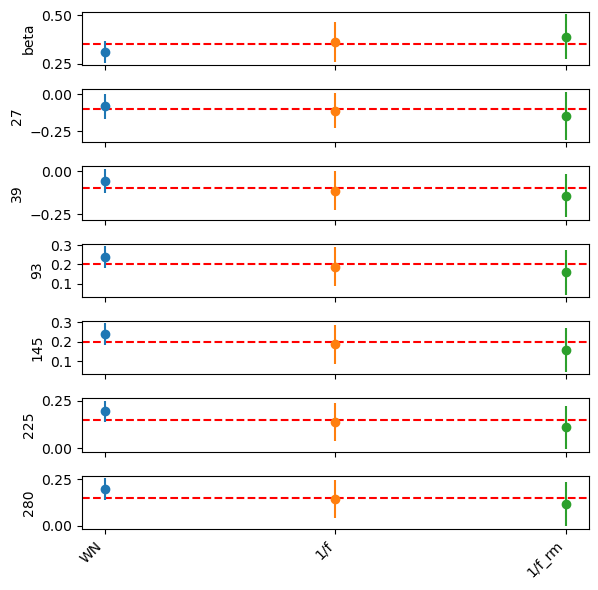

In [29]:
ms.plot()